## PE File Malware Detection in Python


In [1]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
#Loading dataset from training
data = pd.read_csv('copy_dataset_malwares.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name','Malware', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57'], axis=1)
y = data['Malware']

In [3]:
data.head()

,Name,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,...,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,Malware,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,144,3,0,4,0,65535,0,184,...,8192,1048576,4096,0,16,1,NaN,NaN,NaN,NaN
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,144,3,0,4,0,65535,0,184,...,4096,1048576,4096,0,16,1,NaN,NaN,NaN,NaN
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,144,3,0,4,0,65535,0,184,...,4096,1048576,69632,0,528,1,NaN,NaN,NaN,NaN
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,144,3,0,4,0,65535,0,184,...,4096,1048576,4096,0,16,1,NaN,NaN,NaN,NaN
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,144,3,0,4,0,65535,0,184,...,4096,1048576,4096,0,16,1,NaN,NaN,NaN,NaN


In [4]:
data.columns

Index(['Name', 'e_magic', 'e_cblp', 'e_cp', 'e_crlc', 'e_cparhdr',
       'e_minalloc', 'e_maxalloc', 'e_ss', 'e_sp', 'e_csum', 'e_ip', 'e_cs',
       'e_lfarlc', 'e_ovno', 'e_oemid', 'e_oeminfo', 'e_lfanew', 'Machine',
       'NumberOfSections', 'TimeDateStamp', 'PointerToSymbolTable',
       'NumberOfSymbols', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'LoaderFlags', 'NumberOfRvaAndSizes', 'Malware',
       '

In [5]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

X_train.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
17996,23117,144,3,0,4,0,65535,0,184,0,...,56317,57344,3,34144,4194304,16384,1048576,8192,0,16
15684,23117,144,3,0,4,0,65535,0,184,0,...,53909,32768,3,34112,1048576,4096,1048576,4096,0,16
7091,23117,80,2,0,4,15,65535,0,184,0,...,1215280277,1175552,2,0,1048576,16384,1048576,4096,0,16
5374,23117,144,3,0,4,0,65535,0,184,0,...,106294,73728,2,0,1048576,4096,1048576,4096,0,16
174,23117,80,2,0,4,15,65535,0,184,0,...,34535,69632,2,0,1048576,16384,1048576,4096,0,16


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [7]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes
0,0.0,-0.035986,-0.048061,-0.042098,-0.039739,-0.041661,0.147694,-0.016298,-0.035396,-0.030927,...,-0.233333,-0.055252,1.745517,0.974551,2.294950,0.106457,-0.01653,-0.023084,-0.024508,-0.0118
1,0.0,-0.035986,-0.048061,-0.042098,-0.039739,-0.041661,0.147694,-0.016298,-0.035396,-0.030927,...,-0.233338,-0.056272,1.745517,0.972598,-0.017584,-0.043569,-0.01653,-0.031008,-0.024508,-0.0118
2,0.0,-0.097083,-0.048757,-0.042098,-0.039739,-0.025786,0.147694,-0.016298,-0.035396,-0.030927,...,2.211087,-0.008844,-0.354780,-1.108361,-0.017584,0.106457,-0.01653,-0.031008,-0.024508,-0.0118
3,0.0,-0.035986,-0.048061,-0.042098,-0.039739,-0.041661,0.147694,-0.016298,-0.035396,-0.030927,...,-0.233232,-0.054572,-0.354780,-1.108361,-0.017584,-0.043569,-0.01653,-0.031008,-0.024508,-0.0118
4,0.0,-0.097083,-0.048757,-0.042098,-0.039739,-0.025786,0.147694,-0.016298,-0.035396,-0.030927,...,-0.233377,-0.054742,-0.354780,-1.108361,-0.017584,0.106457,-0.01653,-0.031008,-0.024508,-0.0118


In [8]:
skpca = PCA(n_components=45)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9953445092430456


In [26]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

In [27]:
# Random Forest Classifier
model_rf = RFC(n_estimators=100, random_state=0, 
               oob_score=True, max_depth=16, 
               max_features='sqrt')
model_rf.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred_rf = model_rf.predict(X_test_pca)

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0)

# AdaBoost Classifier (without specifying base_estimator)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# Extra Trees Classifier
model_et = ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# List of models
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Training and evaluating each model
for model, model_name in zip(models, model_names):
    model.fit(X_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_pred, y_test))


C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but PCA was fitted without feature names
  warnings.warn(



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       982
           1       0.99      0.99      0.99      2941

    accuracy                           0.99      3923
   macro avg       0.98      0.98      0.98      3923
weighted avg       0.99      0.99      0.99      3923


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       990
           1       0.99      0.98      0.98      2933

    accuracy                           0.98      3923
   macro avg       0.97      0.97      0.97      3923
weighted avg       0.98      0.98      0.98      3923



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.94      0.96      0.95       989
           1       0.99      0.98      0.98      2934

    accuracy                           0.97      3923
   macro avg       0.96      0.97      0.97      3923
weighted avg       0.97      0.97      0.97      3923


Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95       959
           1       0.99      0.98      0.98      2964

    accuracy                           0.98      3923
   macro avg       0.96      0.98      0.97      3923
weighted avg       0.98      0.98      0.98      3923


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       987
           1       0.99      0.99      0.99      2936

    accuracy                           0.99      3923
   ma

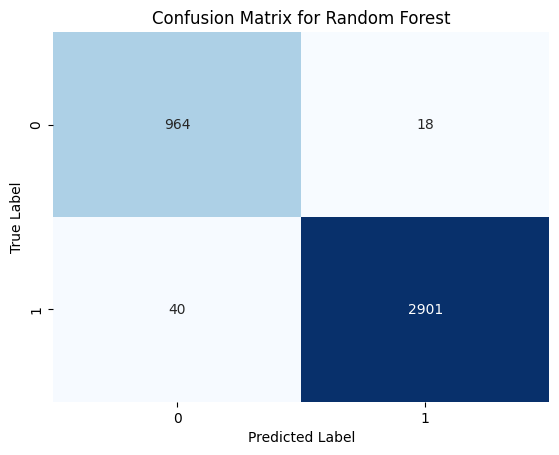

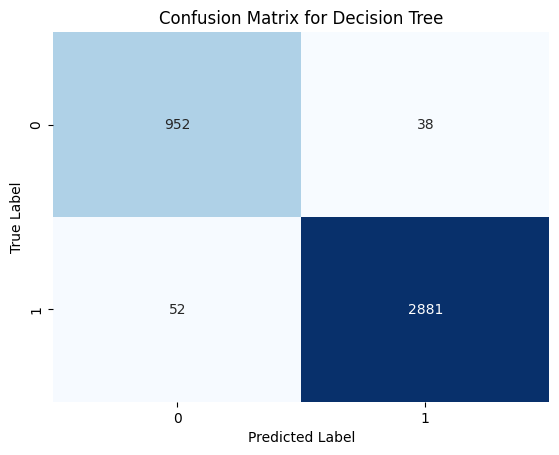

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


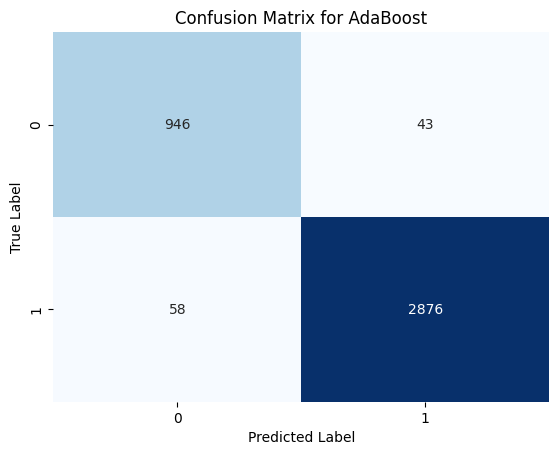

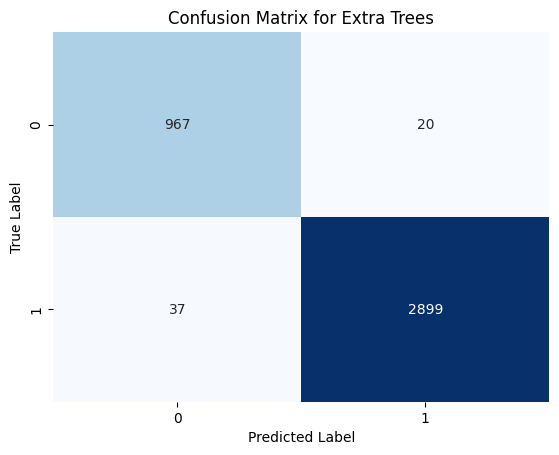

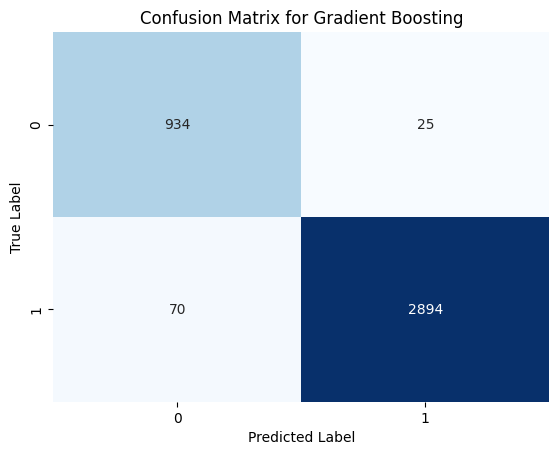

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = [
    RFC(n_estimators=100, random_state=0, oob_score=True, max_depth=16, max_features='sqrt'),
    DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
    ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
]

# Model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train, predict, and evaluate each model
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_pca, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_pca)
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [30]:
from sklearn.pipeline import Pipeline
import joblib

# Define the pipeline
pipe_rf = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_rf)])
pipe_dt = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_dt)])
pipe_ada = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_ada)])
pipe_et = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_et)])
pipe_gbm = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_gbm)])

# List of pipelines
pipelines = [pipe_rf, pipe_dt, pipe_ada, pipe_et, pipe_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train and evaluate each pipeline
for pipeline, model_name in zip(pipelines, model_names):
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Save the pipeline
    joblib.dump(pipeline, f'{model_name}_pipeline.pkl')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


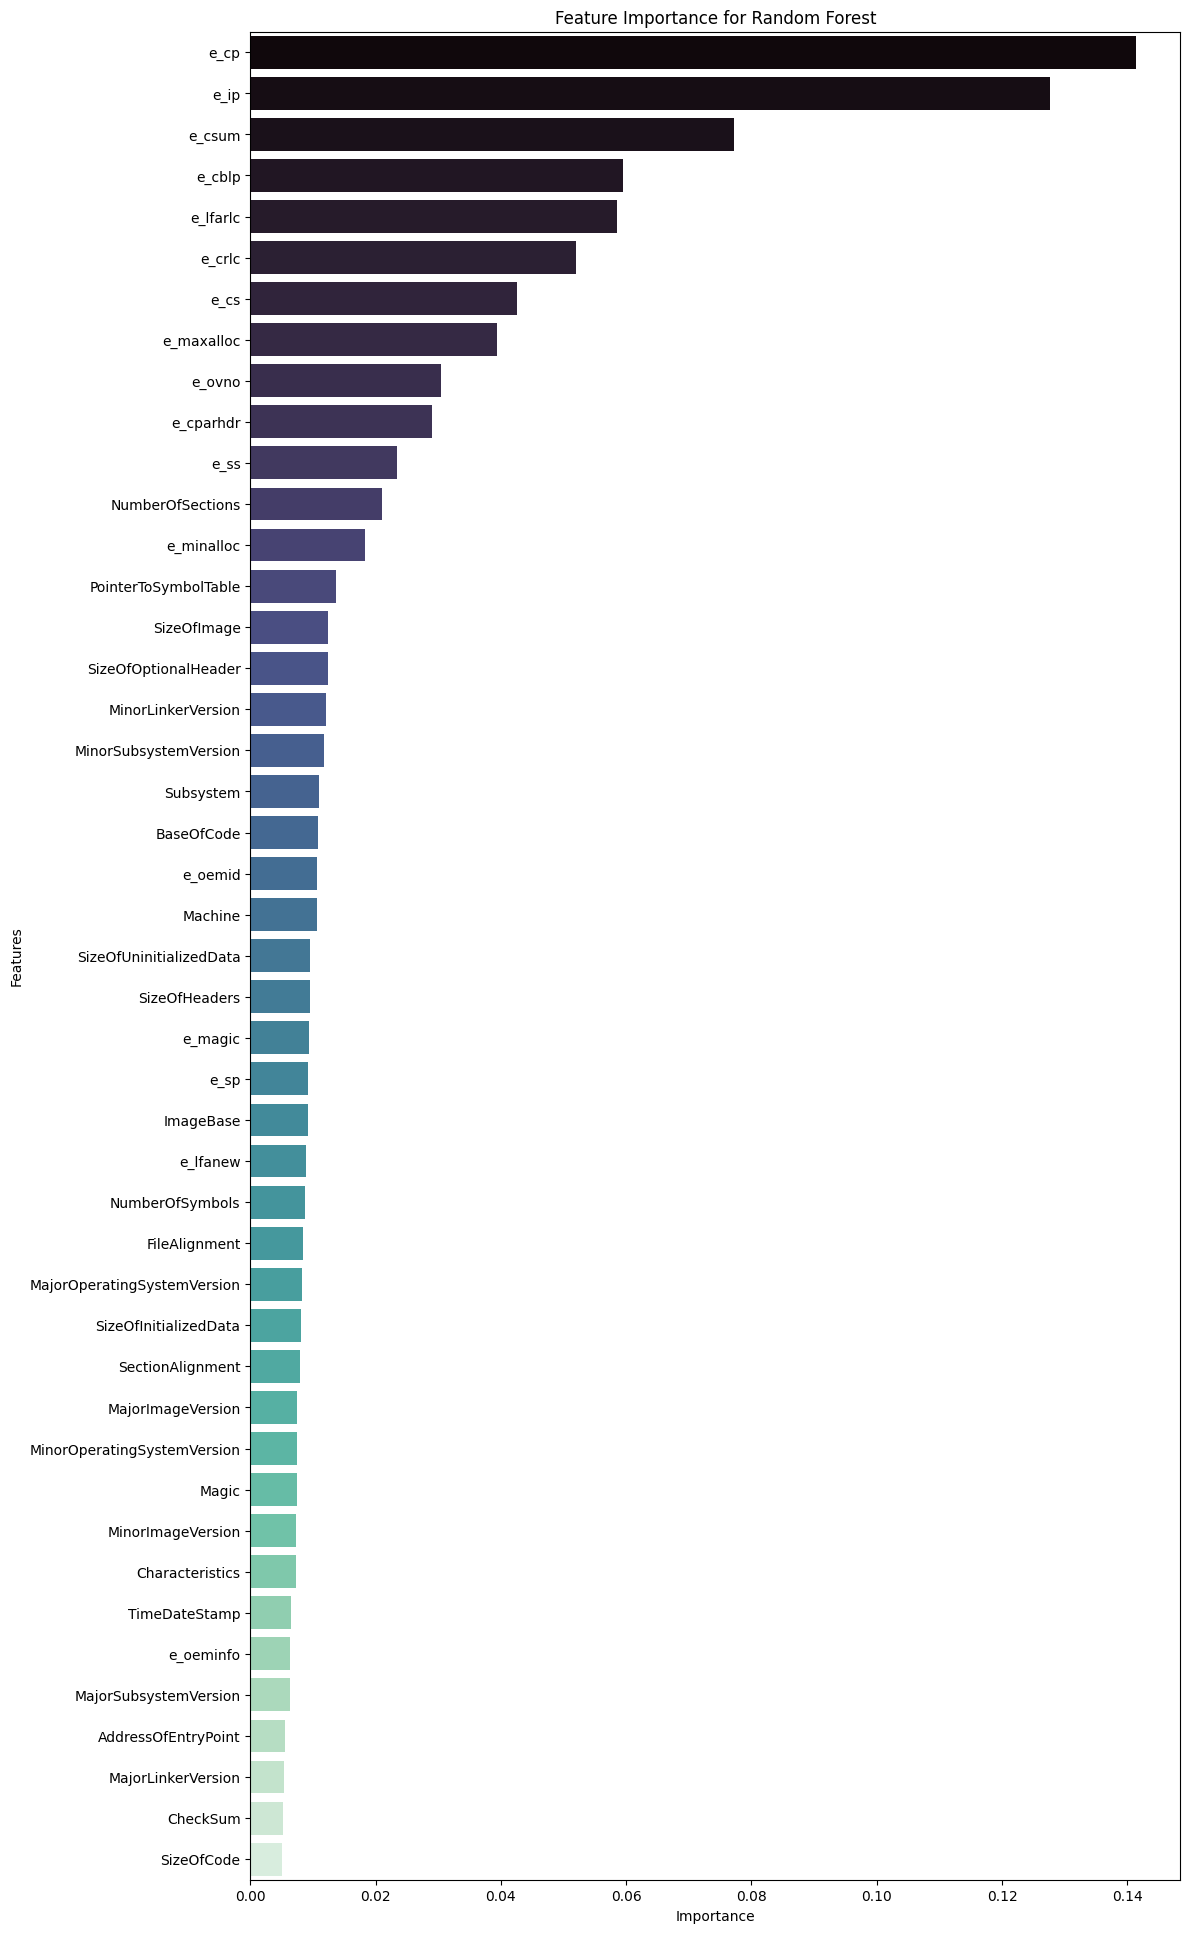

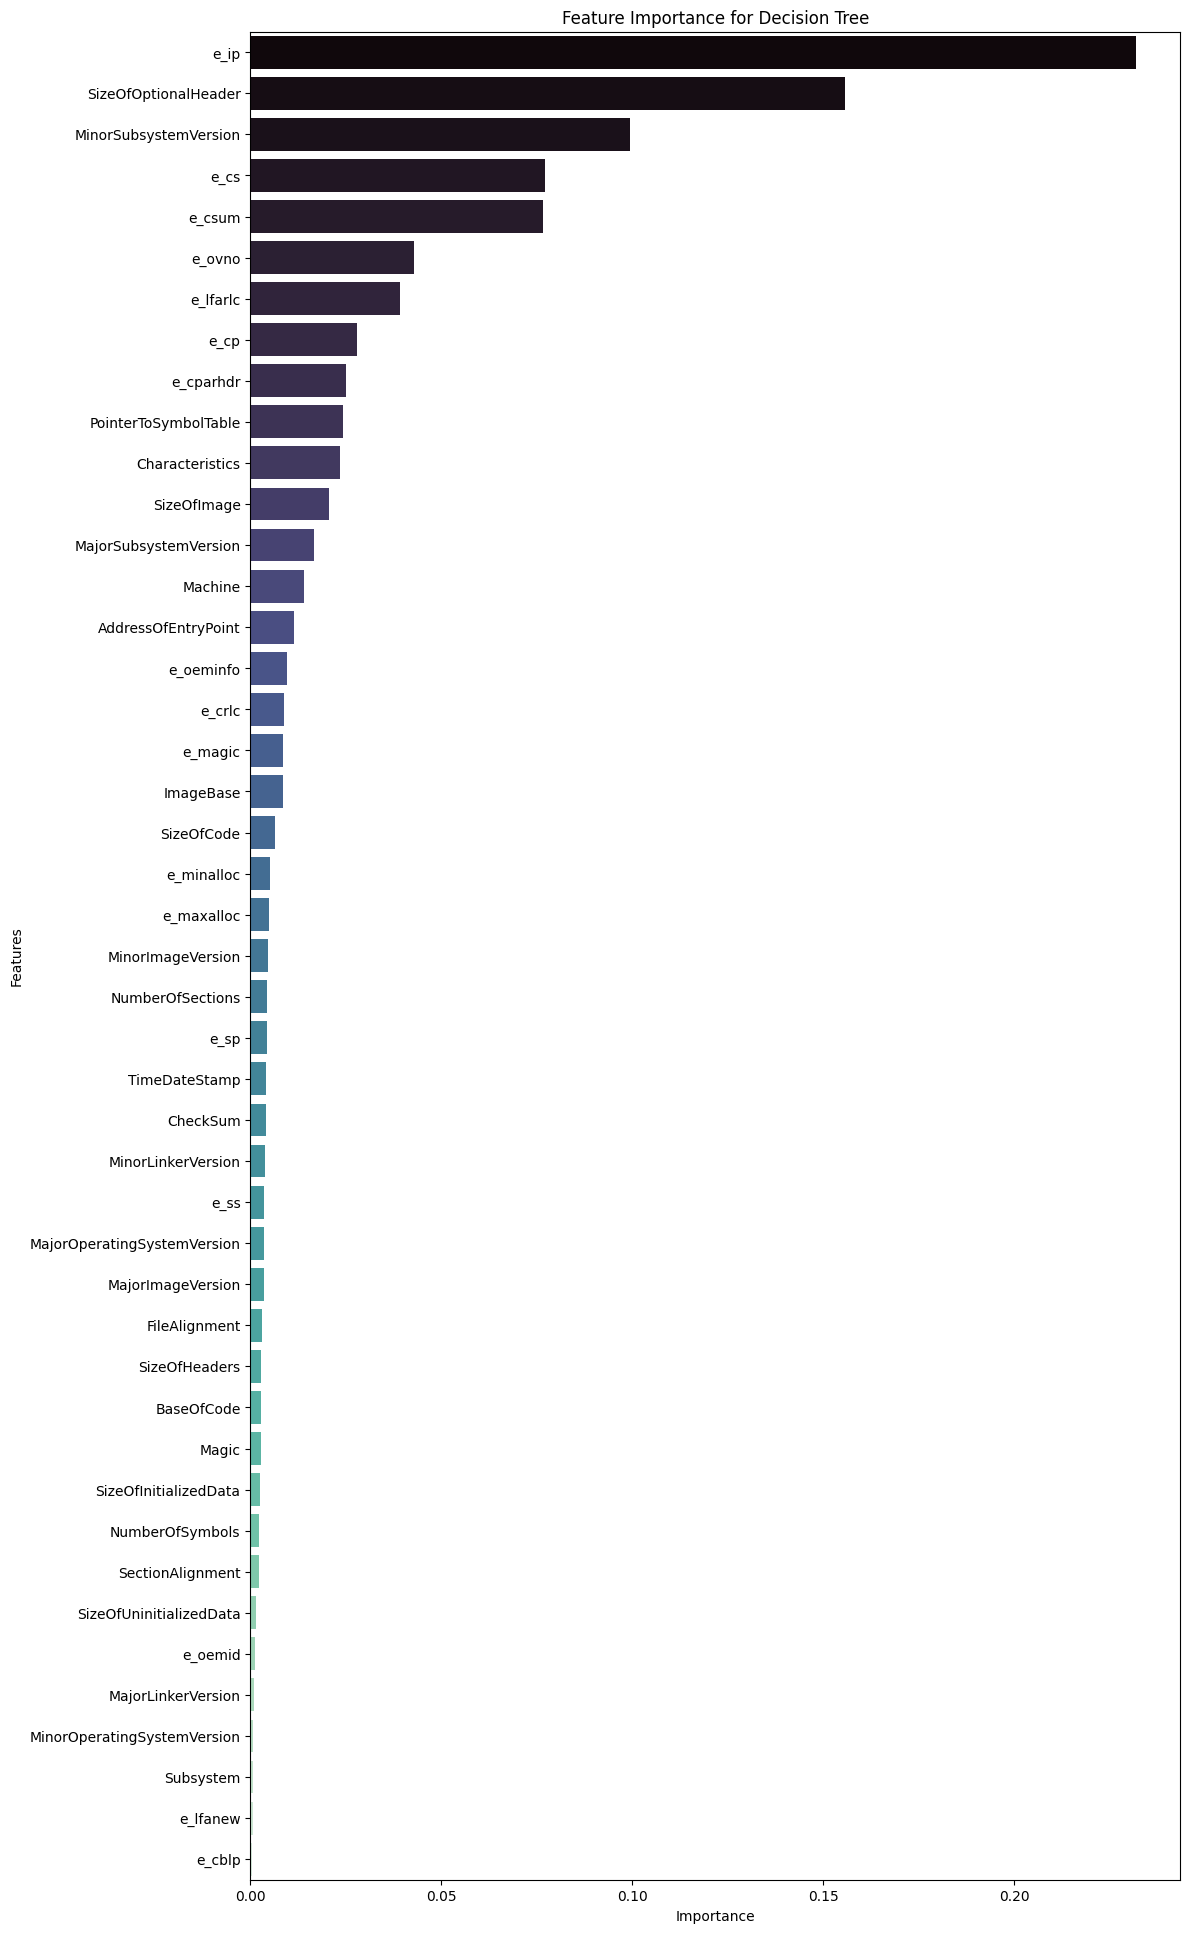

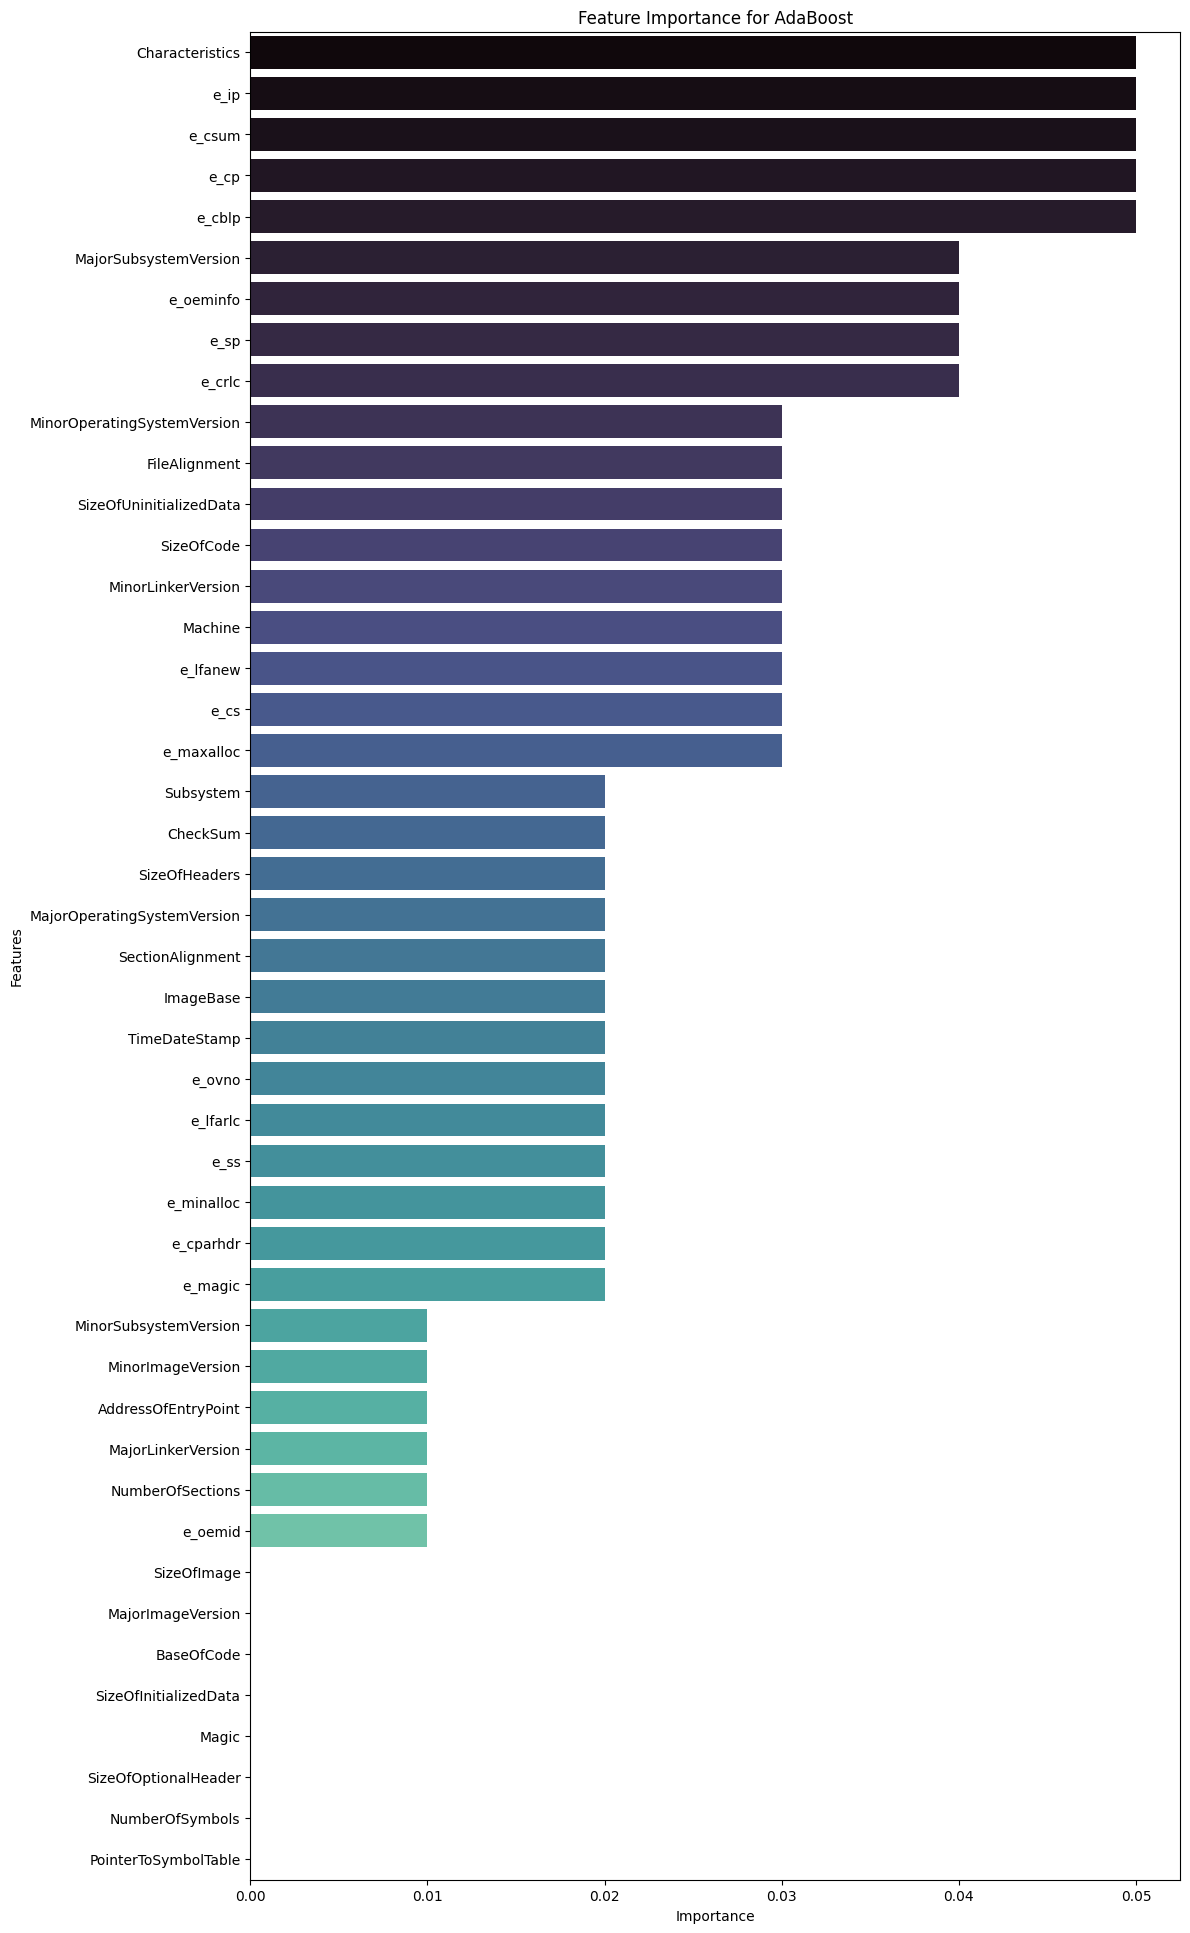

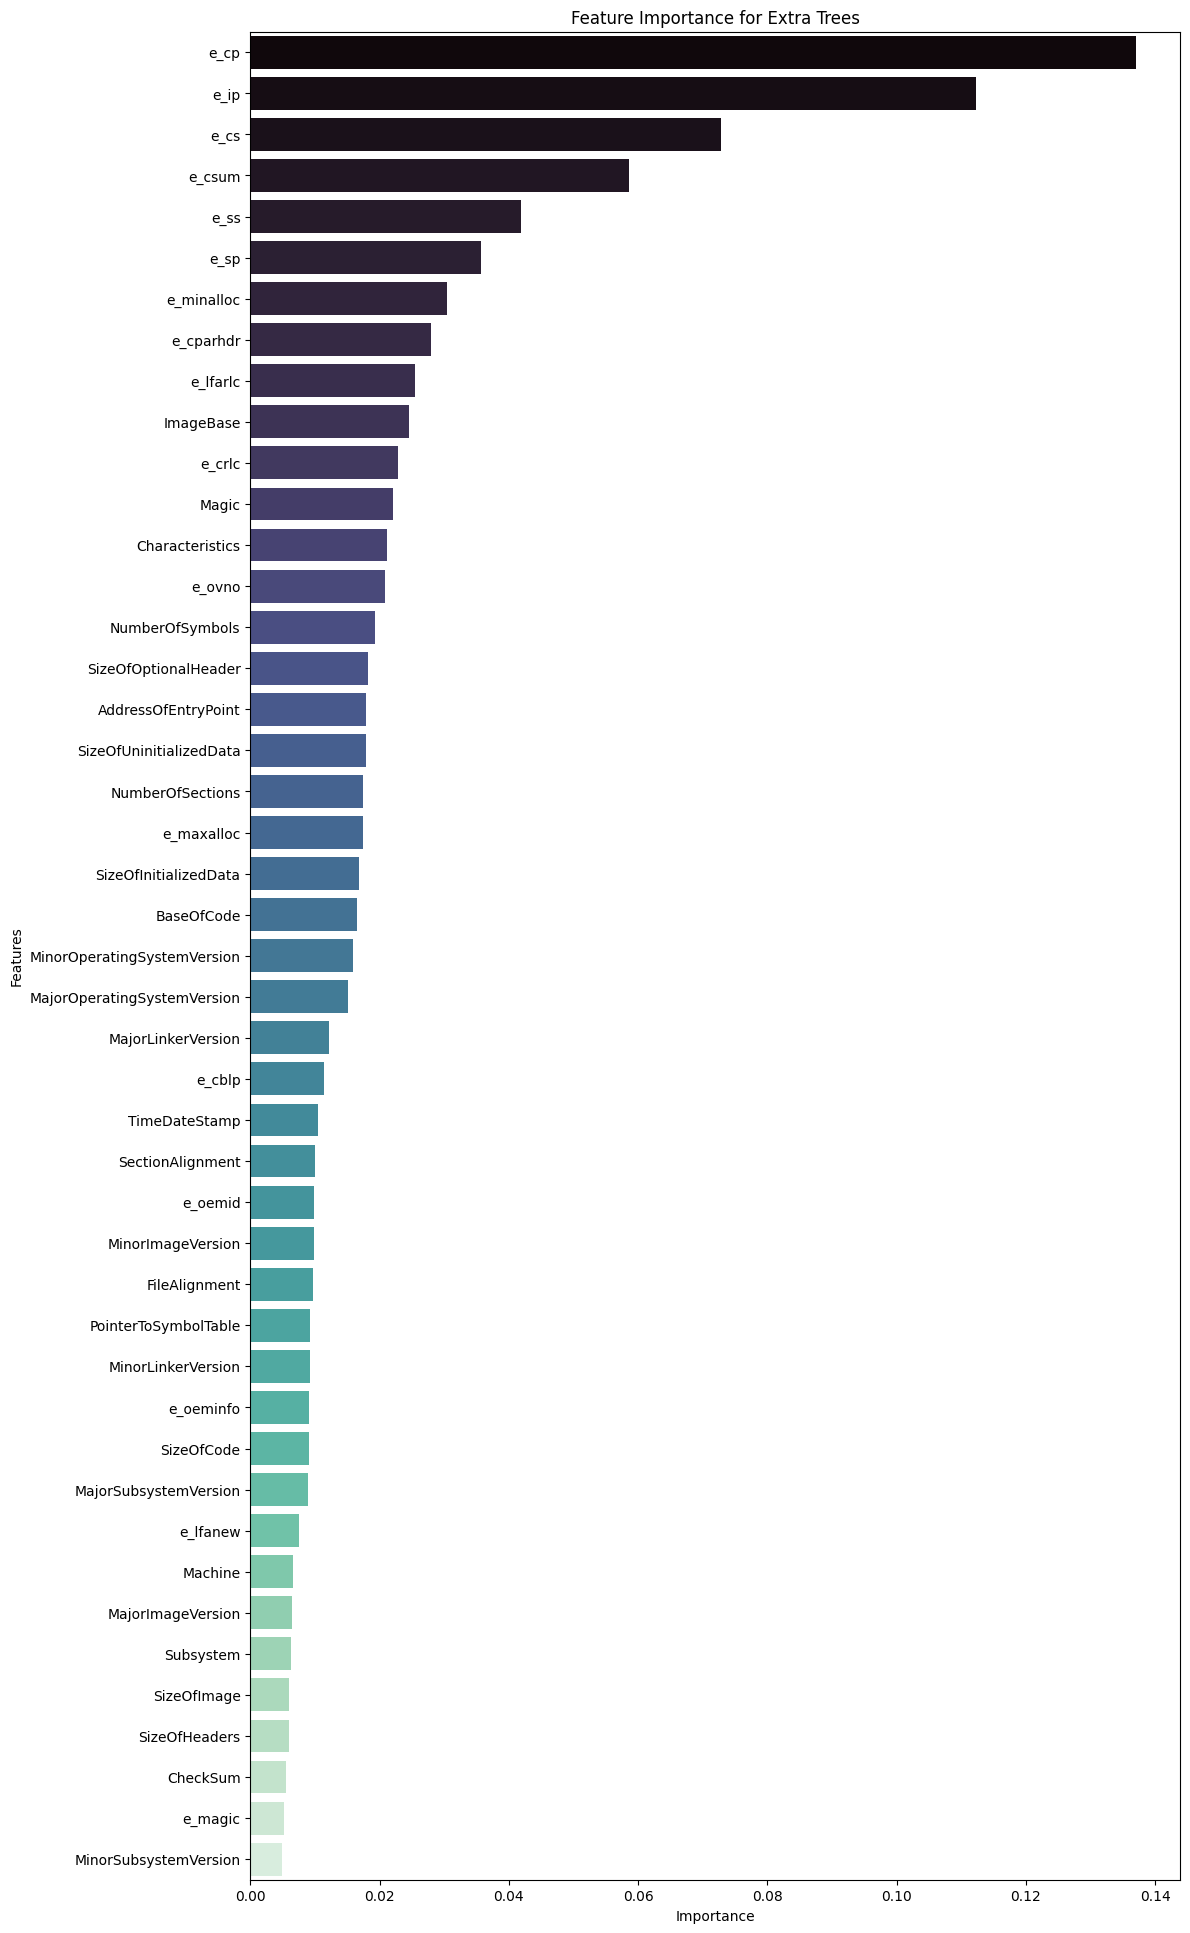

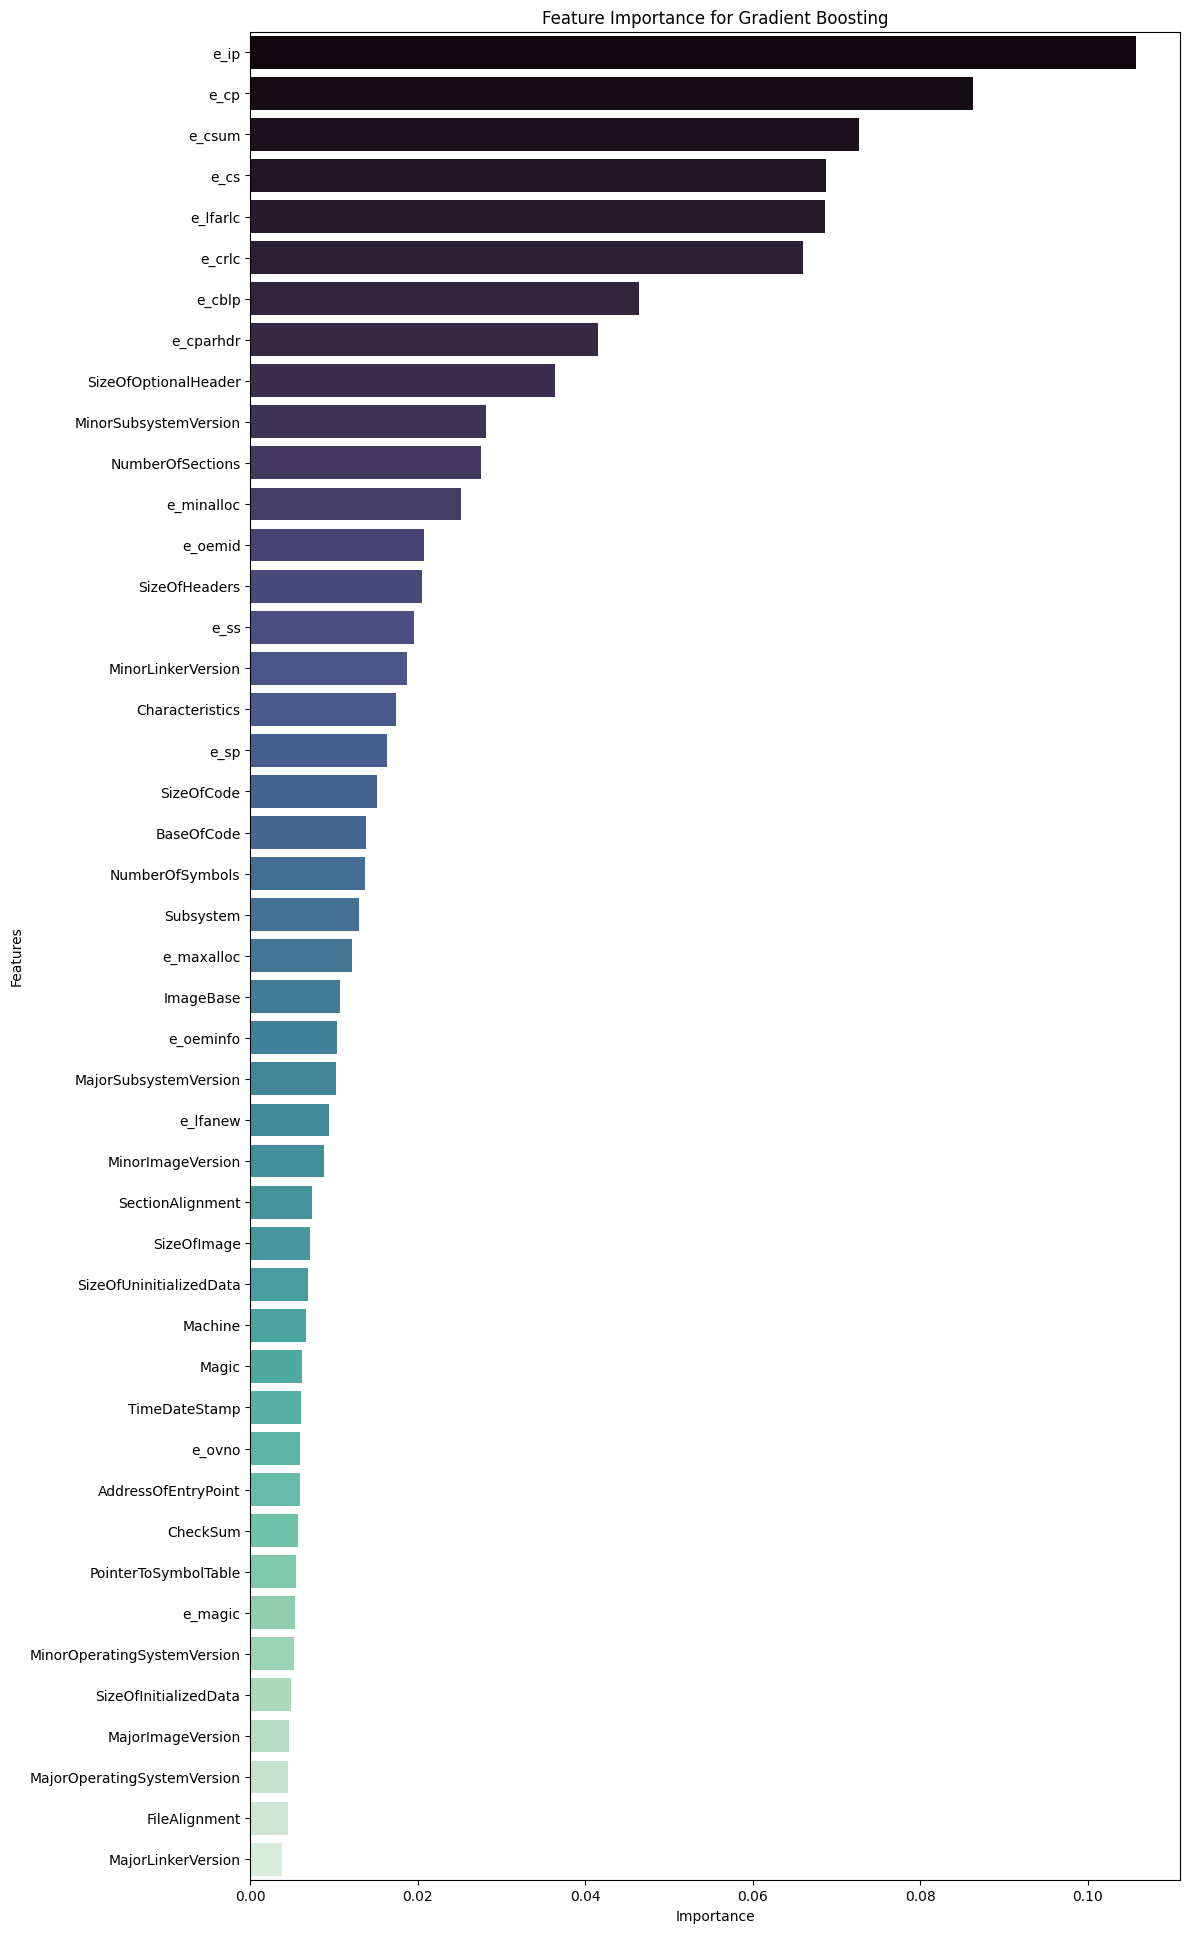

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their corresponding names
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Plot feature importance for each model
for model, model_name in zip(models, model_names):
    # Get feature importances
    importance = model.feature_importances_
    
    # Create a dictionary mapping each feature to its importance value
    importance_dict = {X.columns[i]: importance[i] for i in range(len(importance))}
    
    # Sort the dictionary based on importance values
    sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    
    # Plot the sorted feature importances using a bar plot
    plt.figure(figsize=(12, 24))
    sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], hue=list(sorted_dict.keys())[::-1], palette='mako', legend=False)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

In [39]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["random_forest", "decision_tree", "adaboost", "extra_trees"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'Random Forest_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.882701  0.117299   
1                                 vlc-3.0.2-win64.exe  0.511911  0.488089   
2                                       stinger32.exe  0.070600  0.929400   
3                                SpotifyFullSetup.exe  0.700427  0.299573   
4                                    uftp_english.exe  0.062163  0.937837   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.210909  0.789091   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.153511  0.846489   
7                                   reverse_shell.exe  0.210850  0.789150   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.031336  0.968664   
9                             ScratchInstaller1.4.exe  0.182862  0.817138   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.012154  0.987846   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.001494  0.998506   

In [38]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Random Forest_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)


                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.882701  0.117299
1                                 vlc-3.0.2-win64.exe  0.511911  0.488089
2                                       stinger32.exe  0.070600  0.929400
3                                SpotifyFullSetup.exe  0.700427  0.299573
4                                    uftp_english.exe  0.062163  0.937837
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.210909  0.789091
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.153511  0.846489
7                                   reverse_shell.exe  0.210850  0.789150
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.031336  0.968664
9                             ScratchInstaller1.4.exe  0.182862  0.817138
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.012154  0.987846
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.001494  0.998506
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [17]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Gradient Boosting_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.999158  0.000842
1                                 vlc-3.0.2-win64.exe  0.641683  0.358317
2                                       stinger32.exe  0.000125  0.999875
3                                SpotifyFullSetup.exe  0.879569  0.120431
4                                    uftp_english.exe  0.000409  0.999591
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.000913  0.999087
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.004879  0.995121
7                                   reverse_shell.exe  0.003951  0.996049
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.000017  0.999983
9                             ScratchInstaller1.4.exe  0.998690  0.001310
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.000023  0.999977
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.000015  0.999985
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [40]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('AdaBoost_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.496332  0.503668
1                                 vlc-3.0.2-win64.exe  0.487561  0.512439
2                                       stinger32.exe  0.488236  0.511764
3                                SpotifyFullSetup.exe  0.508875  0.491125
4                                    uftp_english.exe  0.487453  0.512547
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.486086  0.513914
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.487453  0.512547
7                                   reverse_shell.exe  0.485262  0.514738
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.485772  0.514228
9                             ScratchInstaller1.4.exe  0.490127  0.509873
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.476799  0.523201
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.485477  0.514523
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [42]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Extra Trees_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.403353  0.596647
1                                 vlc-3.0.2-win64.exe  0.186633  0.813367
2                                       stinger32.exe  0.082784  0.917216
3                                SpotifyFullSetup.exe  0.435701  0.564299
4                                    uftp_english.exe  0.093028  0.906972
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.135655  0.864345
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.080179  0.919821
7                                   reverse_shell.exe  0.237519  0.762481
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.082187  0.917813
9                             ScratchInstaller1.4.exe  0.063935  0.936065
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.061625  0.938375
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.045547  0.954453
12  3ec4cb928846f8298e5a13b3e96bfc2a70